# Modeling the spread of an epidemic: SIR models

Kaela Nelson

Vol 4A

The SIR model describes the spread of an epidemic through a large population. It achieves this by modeling the movement of the population through three stages of the disease: those who are susceptible, those who are infectuous, and those who have recovered from the disease. We assume those whoa re recovered are immune to the disease. If the outbreak occurs over a short period of time, then we can assume the total population is fixed, so that $S^{'}(t) + I^{'}(t) + R^{'}(t) = 0$ and $S(t) + I(t) + R(t) = 1,$ so that $S(t)$ represents the fraction of the population that is susceptible, etc. 

We find that the transition rate between stages of the disease is given by:
$$\frac{dS}{dt} = -\beta IS,$$
$$\frac{dS}{dt} = \beta IS - \gamma I,$$
$$\frac{dS}{dt} = \gamma I.$$
Further details are outlined here: http://www.acme.byu.edu/wp-content/uploads/2017/08/SIR.pdf .

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_bvp

## Problem 1
Solve the IVP 
$$\frac{dS}{dt} = -\frac{1}{2}IS,$$
$$\frac{dI}{dt} = \frac{1}{2}IS - \frac{1}{4}I,$$
$$\frac{dR}{dt} = \frac{1}{4}I,$$
$$S(0) = 1 - 6.25\dot10^{-7},$$
$$I(0) = 6.25\dot10^{-7}$$
$$R(0) = 0.$$
on the interval [0,100] and plot your results.

In [2]:
s0 = 1 - 6.25*10**(-7)
i0 = 6.25*10**(-7)
r0 = 0
a = 0
b = 100
x = np.linspace(a, b, 100)

def ode(y,x):
    return np.array([-1/2.*y[1]*y[0], 1/2. * y[1]*y[0] - 1/4.*y[1], 1/4.*y[1]])

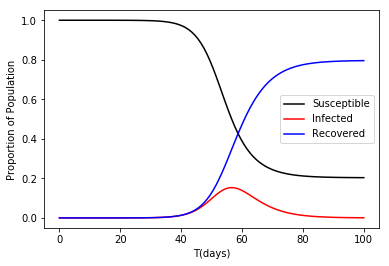

In [3]:
sol = odeint(ode, np.array([s0,i0, r0]), x, atol=1e-10)
plt.plot(x, sol[:,0], "k", label = "Susceptible")
plt.plot(x, sol[:,1], "r", label = "Infected")
plt.plot(x, sol[:,2], "b", label = "Recovered")
plt.ylabel("Proportion of Population")
plt.xlabel("T(days)")
plt.legend()
plt.show()

## Problem 2
Suppose that, in a city of approximately three million, five have recently entered
the city carrying a certain disease. (Suppose they have just entered the infectious state.)
Each of those individuals has a contact each day that could spread the disease, and an
average of three days is spent in the infectious state. Find the solution of the corresponding
SIR equations for the next fifty days and plot your results.
At the peak of the infection, how many in the city will still be able to work (Assume for
simplicity that those who are in the infectious state either cannot go to work or are unproductive,
etc.) Print your result.

In [4]:
a = 0
b = 50
init_cond = np.array([(3000000 - 5)/3000000., 5/3000000., 0])
gamma = 1/3.
beta = 1.
x1 = np.linspace(a, b, 50)

def ode2(y,x):
    return np.array([-beta*y[1]*y[0], beta*y[1]*y[0] - gamma*y[1], gamma*y[1]])

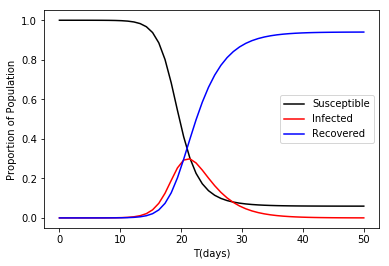

2102988 people can stil work.


In [5]:
sol2 = odeint(ode2, init_cond, x1, atol=1e-10)
plt.plot(x1, sol2[:,0], "k", label = "Susceptible")
plt.plot(x1, sol2[:,1], "r", label = "Infected")
plt.plot(x1, sol2[:,2], "b", label = "Recovered")
plt.ylabel("Proportion of Population")
plt.xlabel("T(days)")
plt.legend()
plt.show()
maxi = max(sol2[:, 1])
print (int((1-maxi)*3000000), "people can stil work.")

## Problem 3
Suppose that, in a city of approximately three million, five have recently entered
the city carrying a certain disease. (Suppose they have just entered the infectious state.)
Each of those individuals will make three contacts every ten days that could spread the
disease, and an average of four days is spent in the infectious state. Find the solution of the
corresponding SIR equations and plot your results. See Figure 4.2.

In [6]:
a = 0
b = 500
init_cond = np.array([(3000000 - 5)/3000000., 5/3000000., 0])
gamma = 1/4.
beta = 3/10.
x1 = np.linspace(a, b, 500)

def ode2(y,x):
    return np.array([-beta*y[1]*y[0], beta*y[1]*y[0] - gamma*y[1], gamma*y[1]])

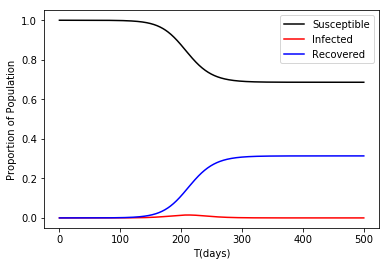

2955801 people can stil work.


In [7]:
sol2 = odeint(ode2, init_cond, x1, atol=1e-10)
plt.plot(x1, sol2[:,0], "k", label = "Susceptible")
plt.plot(x1, sol2[:,1], "r", label = "Infected")
plt.plot(x1, sol2[:,2], "b", label = "Recovered")
plt.ylabel("Proportion of Population")
plt.xlabel("T(days)")
plt.legend()
plt.show()
maxi = max(sol2[:, 1])
print (int((1-maxi)*3000000), "people can stil work.")

## Problem 4
In the world there are 7 billion people. Influenza, or the flu, is one of those
viruses that everyone can be susceptible to, even after recovering from their last sickness. The
flu virus is able to change in order to evade our immune system and we become susceptible once
more (although technically it is now a different strain). Suppose the virus originates with 1000
people in Texas after Hurricane Harvey flooded Houston and stagnant water allowed the virus
to proliferate. According to WebMD (trustworthy source, right?), once you get the virus you
are contagious up to a week, and kids up to 2 weeks. For this lab, suppose you are contagious
for 10 days before recovering. Also suppose that on average someone makes one contact every
two days that could spread the flu. Since we can catch a new strain of the flu, suppose that
a recovered individual becomes susceptible again with probability f = 1/50. The flu is also
known to be deadly, killing hundreds of thousands every year on top of the normal death rate.
To assure a steady population, let the birth rate balance out the death rate, and in particular
let µ = .0001.
Using the SIRS model above, plot the proportion of population that is Susceptible, Infected,
and Recovered over a year span (365 days).

In [8]:
a = 0
b = 365
total_pop = 7*1e9

init_cond = np.array([(total_pop - 1000)/total_pop, 1000./total_pop, 0])
gamma = 1/10.
beta = 1/2.
mu = .0001
f = 1/50.
x3 = np.linspace(a, b, 365)

def ode3(y,x):
    return np.array([f*y[2] + mu*(1-y[0]) - beta*y[1]*y[0], beta*y[1]*y[0] - (gamma + mu)*y[1], -f*y[2] + gamma*y[1] - mu*y[2]])


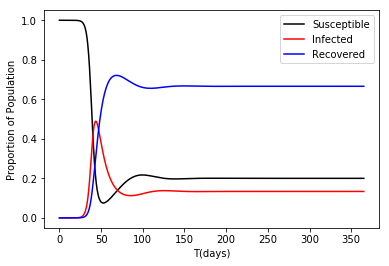

In [9]:
sol3 = odeint(ode3, init_cond, x3, atol=1e-10)
plt.plot(x3, sol3[:,0], "k", label = "Susceptible")
plt.plot(x3, sol3[:,1], "r", label = "Infected")
plt.plot(x3, sol3[:,2], "b", label = "Recovered")
plt.ylabel("Proportion of Population")
plt.xlabel("T(days)")
plt.legend()
plt.show()

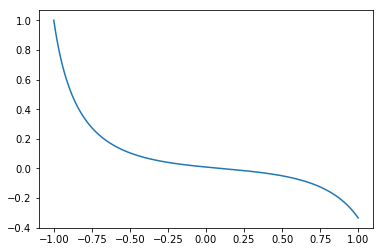

In [10]:
epsilon, lbc, rbc = .1, 1, - 1/3

# The ode function takes the independent variable first
# It has return shape (n,)
def ode(x , y):
    return np.array([y[1] , (1/epsilon) * (y[0] - y[0] * y[1])])

# The BVP solver expects you to pass it the boundary
# conditions as a callable function that computes the difference
# between a guess at the boundary conditions
# and the desired boundary conditions.
# When we use the BVP solver, we will tell it how many constraints
# there should be on each side of the domain so that it knows
# how many entries to expect in the tuples BCa and BCb.
# In this case, we have one boundary condition on either side.
# These constraints are expected to evaluate to 0 when the
# boundary condition is satisfied.
# The return shape of bcs() is (n,)

def bcs(ya, yb):
    BCa = np.array([ya[0] - lbc])   # 1 Boundary condition on the left
    BCb = np.array([yb[0] - rbc])   # 1 Boundary condition on the right
    # The return values will be 0s when the boundary conditions are met exactly
    return np.hstack([BCa, BCb])

# The independent variable has size (m,) and goes from a to b with some step size
X = np.linspace(-1, 1, 200)

# The y input must have shape (n,m) and includes our initial guess for the  boundaries
y = np.array([-1/3, -4/3]).reshape((-1,1))*np.ones((2, len(X)))

# There are multiple returns from solve_bvp(). We are interested in the y values which can be found in the sol field.
solution = solve_bvp(ode, bcs, X, y)

# We are interested in only y, not y', which is found in the first row of sol.
y_plot = solution.sol(X)[0]
plt.plot(X, y_plot)
plt.show()

## Problem 5
See question 5 outlined in http://www.acme.byu.edu/wp-content/uploads/2017/08/SIR.pdf for details.

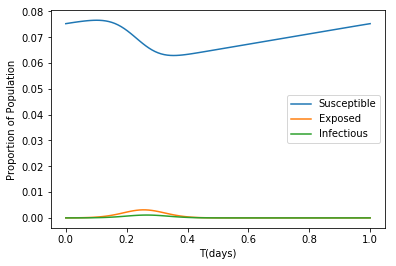

In [11]:
beta1 = 1
beta0 = 1575
n = 0.01
lam = 0.0279
mu = 0.02
a = 0
b = 1
X = np.linspace(a,b,100)

beta_t = lambda t: beta0*(1.+ beta1*np.cos(2.*np.pi*t))

def ode(t, y):
    length = len(y[0])
    return np.array([mu -  beta_t(t)*y[0]*y[2], beta_t(t)*y[0]*y[2] - y[1]/lam, y[1]/lam - y[2]/n, 0*np.zeros(length),0*np.zeros(length),0*np.zeros(length)])

def bcs(ya, yb):
    BCa = ya[0:3] - ya[3:] # 1 Boundary condition on the left
    BCb = yb[0:3] - yb[3:] # 1 Boundary condition on the right
    return np.hstack([BCa, BCb])

# y = np.array([0.075, 0, 0, 0.075, 0, 0]).reshape((-1,1))*np.ones((2, len(X)))
y = np.array([.07, .0001, .0001, .08, .0001, .0001]).reshape((-1,1))*np.ones((6,len(X)))

solution = solve_bvp(ode, bcs, X, y)

# We are interested in only y, not y', which is found in the first row of sol.
y_plot = solution.sol(X)
plt.plot(X, y_plot[0], label = "Susceptible")
plt.plot(X, y_plot[1], label = "Exposed")
plt.plot(X, y_plot[2], label = "Infectious")
plt.ylabel("Proportion of Population")
plt.xlabel("T(days)")
plt.legend()
plt.show()